<div style="background:#ddffff;border-left: 6px solid #2196f3;">
<h1 style="text-align:center;">Interpolation and extrapolation</h1>
<hr style="width:65%;height:2px;border-width:1;color:gray;background-color:gray;">
<p style="padding-left:20px;padding-right:20px;"></p>
</div>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import interpolate

In [12]:
def brownianNoise(N):
    return np.cumsum(np.random.randn(N))

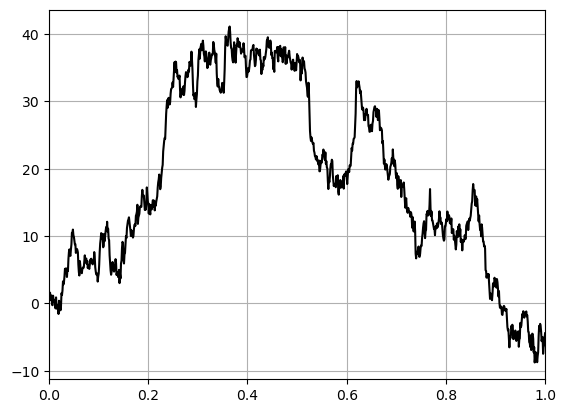

In [13]:
N = 1_001
x = np.linspace(0, 1, N)
y = brownianNoise(N)

plt.plot(x, y, 'k')
plt.xlim([x[0], x[-1]])
plt.grid()
plt.show()

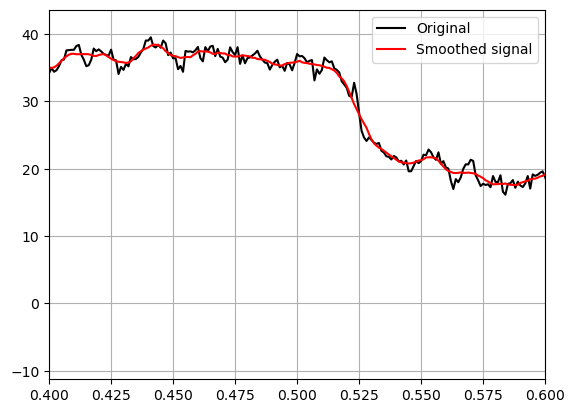

In [14]:
# apply a mean-smoothing filter

k = 11
y_ = np.convolve(y,np.ones(k)/k, mode='same')

plt.plot(x, y, 'k', label="Original")
plt.plot(x, y_, 'r', label='Smoothed signal')
plt.xlim([.4, .6])
plt.legend()
plt.grid()
plt.show()

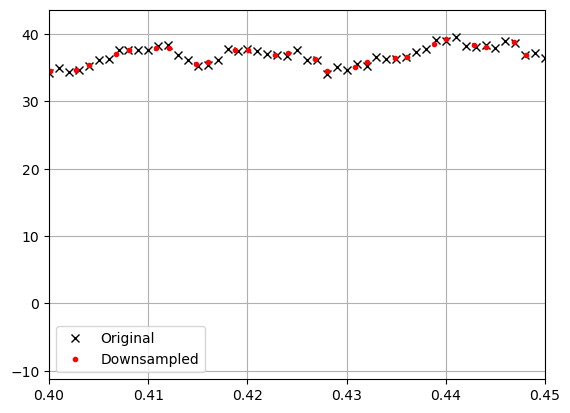

In [15]:
y_downSampled = signal.resample(y, N//2)
x_downSampled = signal.resample(x, N//2)

plt.plot(x, y, 'kx', label='Original')
plt.plot(x_downSampled, y_downSampled, 'r.', label='Downsampled')
plt.xlim([.4, .45])
plt.legend()
plt.grid()
plt.show()

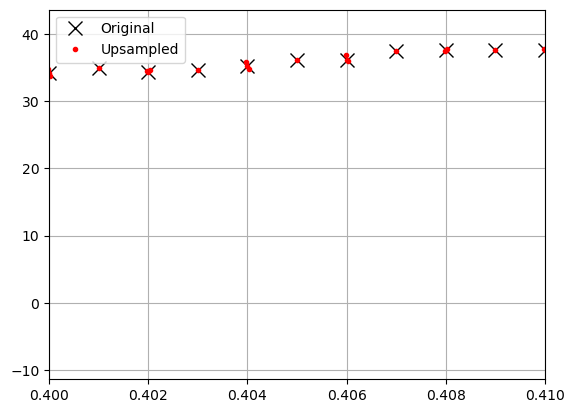

In [16]:
y_upSampled = signal.resample(y, 2*N)
x_upSampled = signal.resample(x, 2*N)

plt.plot(x, y, 'kx', markersize=10, label="Original")
plt.plot(x_upSampled, y_upSampled, 'r.', label="Upsampled")
plt.xlim([.40, .410])
plt.legend()
plt.grid()
plt.show()

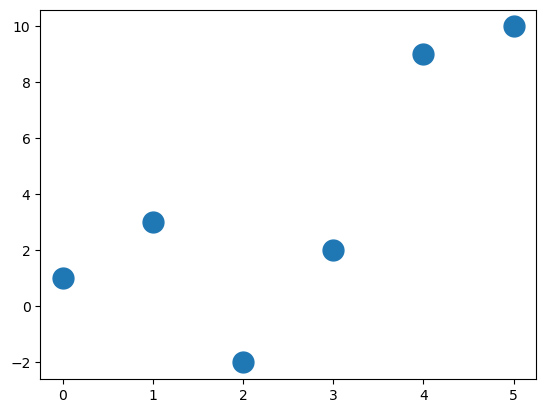

In [17]:
signal = np.array([1, 3, -2, 2, 9, 10])
plt.plot(signal, 'o', markersize=15)
plt.show()

In [18]:
interpolationFactor = 2
interpolationPoints = np.linspace(0, len(signal) - 1, len(signal)*interpolationFactor)
originalPoints = np.arange(len(signal))

interpolatedSignal = np.interp(interpolationPoints, originalPoints, signal) # new X, original X, original Y, output is new Y

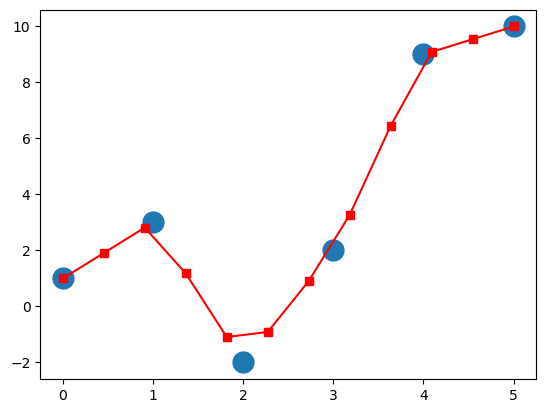

In [19]:
plt.plot(signal, 'o', markersize=15)
plt.plot(interpolationPoints, interpolatedSignal, 'rs-')
plt.show()

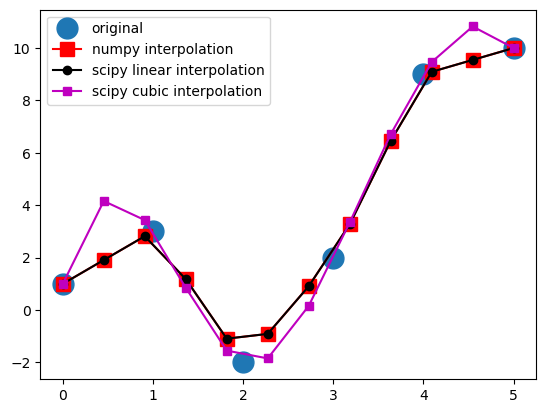

In [33]:
# using scipy

interpolationFunctionLinear = interpolate.interp1d(originalPoints, signal, kind='linear')
interpolatedSignalLinear = interpolationFunctionLinear(interpolationPoints)

interpolationFunctionCubic = interpolate.interp1d(originalPoints, signal, kind='cubic')
interpolatedSignalCubic = interpolationFunctionCubic(interpolationPoints)

plt.plot(signal, 'o', markersize=15, label='original')
plt.plot(interpolationPoints, interpolatedSignal, 'rs-', markersize=10, label='numpy interpolation')
plt.plot(interpolationPoints, interpolatedSignalLinear, 'ko-', label='scipy linear interpolation')
plt.plot(interpolationPoints, interpolatedSignalCubic, 'ms-', label='scipy cubic interpolation')

plt.legend()
plt.show()